In [1]:
import numpy as np
import cshogi

In [2]:
board = cshogi.Board()

In [4]:
PIECE_VALUES = np.array([
    0,  # NONE
    100,  # BPAWN
    200,  # BLANCE
    200,  # BKNIGHT
    300,  # BSILVER
    1000,  # BBISHOP
    1000,  # BROOK
    300,  # BGOLD
    0,  # BKING
    500,  # BPROM_PAWN
    400,  # BPROM_LANCE
    400,  # BPROM_KNIGHT
    300,  # BPROM_SILVER,
    2000,  # BPROM_BISHOP
    2000,  # BPROM_ROOK
    None,  # NOTUSE
    None,  # NOTUSE
    -100,  # WPAWN
    -200,  # WLANCE
    -200,  # WKNIGHT
    -300,  # WSILVER
    -1000,  # WBISHOP
    -1000,  # WROOK
    -300,  # WGOLD
    0,  # WKING
    -500,  # WPROM_PAWN
    -400,  # WPROM_LANCE
    -400,  # WPROM_KNIGHT
    -300,  # WPROM_SILVER,
    -2000,  # WPROM_BISHOP
    -2000,  # WPROM_ROOK
])

HAND_PIECE_VALUES = np.array([
    100,  # HPAWN
    200,  # HLANCE
    200,  # HKNIGHT
    300,  # HSILVER
    300,  # HGOLD
    1000,  # HBISHOP
    1000,  # HROOK
])

In [417]:
def get_value():
    eval_board = PIECE_VALUES[board.pieces]
    eval_board_in_hand = HAND_PIECE_VALUES * np.array(board.pieces_in_hand[0]) 
    - HAND_PIECE_VALUES * np.array(board.pieces_in_hand[1])
    value = np.sum(eval_board) + np.sum(eval_board_in_hand)
    return value if board.turn==0 else -value

def negamax(depth):
    if depth==0:
        return get_value()
    if board.is_game_over():
        return -100000 if board.turn==0 else 100000
    values = []
    for move in board.legal_moves:
        board.push(move)
        values.append(-negamax(depth-1))
        board.pop()
    values = np.array(values)
    best_value = np.max(values)
    return best_value

def get_score(move):
    board.push(move)
    score = get_value()
    board.pop()
    return score

def negaalpha(moves,depth,alpha,beta):
    if depth==0:
        return get_value()
    if board.is_game_over():
        return -100000 if board.turn==0 else 100000
    for move in moves:
        board.push(move)
        alpha = max(alpha,-negaalpha(board.legal_moves,depth-1,-beta,-alpha))
        board.pop()
        if alpha>=beta:
            return alpha
    return alpha

def search(depth):
    alpha,beta = -np.inf,np.inf
    values = []
    for move in board.legal_moves:
        board.push(move)
        alpha = max((negaalpha(board.legal_moves,depth,-beta,-alpha)),alpha)
        board.pop()
        values.append(alpha)
    np.array(values).argmax()
    return list(board.legal_moves)[np.array(values).argmax()]

In [418]:
board.reset()
random_play()

0

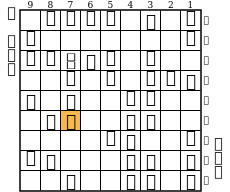

In [419]:
board

In [420]:
negamax(2)

500

In [422]:
search(3)

10370

In [213]:
def random_play():
    while True:
        if board.is_game_over() or len(board.history)>100:
            break
        move = np.random.choice(list(board.legal_moves))
        board.push(move)
    return 1-board.turn

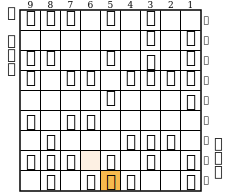

In [121]:
board

In [123]:
board.pieces_in_hand

([0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0])

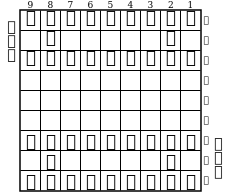

In [423]:
board.reset()
board

2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78


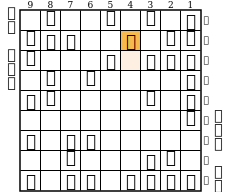

In [429]:
board.reset()
while not(board.is_game_over()):
    board.push(search(3))
    if board.is_game_over():
        break
    board.push(np.random.choice(np.array(list(board.legal_moves))))
    print(len(board.history))
board

In [401]:
len(board.history)

48

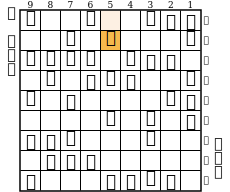

In [416]:
board